# A2 - Predicting Car Prices

# Task1 : Experiment

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Load data

In [2]:
df = pd.read_csv(r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\Cars.csv')

In [3]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data - This mean you have 12 feature and 1 label
df.shape

(8128, 13)

In [5]:
# Check Statistical info
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# 2. Exploratory Data Analysis

In [8]:
df_eda = df.copy()

## Renaming

In [9]:
# Renaming 
df_eda.rename(columns = {
        'name':'brand'}, inplace = True)
df_eda.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Mapping owner 

In [10]:
df_eda["owner"].unique() 

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [11]:
mapping = {
    'First Owner' : 1,
    'Second Owner' : 2,
    'Third Owner' : 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car' : 5,
}

df_eda['owner'] = df_eda['owner'].map(mapping)

In [12]:
df_eda["owner"].unique() 

array([1, 2, 3, 4, 5])

## Remove row in fuel with CNG and LPG

In [13]:
df_eda["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [14]:
df_eda = df_eda[~df_eda['fuel'].str.contains('CNG|LPG')]

In [15]:
df_eda["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

## In mileage (Remove "kmpl" unit in the data and convert to numberic type)

In [16]:
df_eda["mileage"].unique() 

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '24.52 kmpl',
       '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl',
       '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl', '18.2 kmpl',
       '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl', '23.95 kmpl',
       '17.0 kmpl', '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl',
       '18.5 kmpl', '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl',
       '26.0 kmpl', '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '16.47 kmpl', '15.04 kmpl',
      

In [17]:
# Remove 'kmpl' from the 'mileage' column
df_eda['mileage'] = df_eda['mileage'].str.replace(' kmpl', '', regex=True)
df_eda["mileage"].unique() 

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '23.59', '20.0',
       '19.01', '17.3', '19.3', nan, '18.9', '18.15', '24.52', '19.7',
       '22.54', '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7',
       '18.2', '16.8', '24.3', '14.0', '18.6', '23.95', '17.0', '20.63',
       '13.93', '16.0', '17.8', '18.5', '12.55', '12.99', '14.8', '13.5',
       '26.0', '20.65', '27.3', '11.36', '17.68', '14.28', '18.53',
       '14.84', '21.12', '20.36', '21.27', '18.16', '22.0', '25.1',
       '20.51', '21.66', '25.2', '22.9', '16.02', '20.54', '22.77',
       '15.71', '23.1', '19.02', '19.81', '16.47', '15.04', '19.1',
       '21.79', '18.8', '21.21', '15.37', '11.79', '19.0', '14.3', '15.8',
       '15.1', '19.09', '22.32', '21.9', '14.53', '21.63', '20.85',
       '20.45', '19.67', '23.01', '20.77', '17.92', '17.01', '22.37',
       '19.33', '9.5', '12.83', '22.48', '16.78', '14.67', '15.0',
       '13.96', '18.0', '12.07', '26.21', '10.8', '16.3', '13.6', '14.74',
       '

In [18]:
# Convert things in 'mileage' column into numeric & Nothing into NaN (Not a Number)
df_eda['mileage'] = pd.to_numeric(df_eda['mileage'], errors='coerce')
df_eda["mileage"].dtype

dtype('float64')

## In engine column (Remove "CC" amd convert column into numerical type)

In [19]:
df_eda["engine"].unique() 

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1061 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [20]:
# Remove 'CC' from the 'engine' column
df_eda['engine'] = df_eda['engine'].str.replace('CC', '', regex=True)
df_eda["engine"].unique() 

array(['1248 ', '1498 ', '1497 ', '1396 ', '1298 ', '1197 ', '796 ',
       '1364 ', '1399 ', '1461 ', '993 ', nan, '1061 ', '1198 ', '1199 ',
       '998 ', '1591 ', '2179 ', '1368 ', '2982 ', '2494 ', '2143 ',
       '2477 ', '1462 ', '2755 ', '1968 ', '1798 ', '1196 ', '1373 ',
       '1598 ', '1998 ', '1086 ', '1194 ', '1172 ', '1405 ', '1582 ',
       '999 ', '2487 ', '1999 ', '3604 ', '2987 ', '1995 ', '1451 ',
       '1969 ', '2967 ', '2497 ', '1797 ', '1991 ', '2362 ', '1493 ',
       '1599 ', '1341 ', '1794 ', '799 ', '1193 ', '2696 ', '1495 ',
       '1186 ', '1047 ', '2498 ', '2956 ', '2523 ', '1120 ', '624 ',
       '1496 ', '1984 ', '2354 ', '814 ', '793 ', '1799 ', '936 ',
       '1956 ', '1997 ', '1499 ', '1948 ', '2997 ', '2489 ', '2499 ',
       '2609 ', '2953 ', '1150 ', '1994 ', '1388 ', '1527 ', '2199 ',
       '995 ', '2993 ', '1586 ', '1390 ', '909 ', '2393 ', '3198 ',
       '1339 ', '2835 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ',
       '2596 ', '2148 ', '

In [21]:
# Convert things in 'engine' column into numeric & Nothing into NaN (Not a Number)
df_eda['engine'] = pd.to_numeric(df_eda['engine'], errors='coerce')
df_eda["engine"].dtype

dtype('float64')

## max_power column (Remove unit and Change to numberic)

In [22]:
df_eda["max_power"].unique() 

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp',
       '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp', '168.5 bhp',
       '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp', '103.25 bhp',
       '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp', '170 bhp',
       '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp', '108.62 bhp',
       '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp', '67.04 bhp',
       '68.05 bhp', '82.85 bhp', '81.80 bhp', '73 bhp', '120 bhp',
       '94.68 bhp', '160 bhp', '65 bhp', '155 bhp', '69.01 bhp',
       '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp', '98.96 bhp',
       '62.1 bhp', '86.7 bhp', '18

In [23]:
# Remove 'bhp' from the 'max_power' column
df_eda['max_power'] = df_eda['max_power'].str.replace('bhp', '', regex=True)
df_eda["max_power"].unique() 

array(['74 ', '103.52 ', '78 ', '90 ', '88.2 ', '81.86 ', '37 ', '67.1 ',
       '68.1 ', '108.45 ', '60 ', '73.9 ', nan, '67 ', '82 ', '88.5 ',
       '46.3 ', '88.73 ', '64.1 ', '98.6 ', '88.8 ', '83.81 ', '83.1 ',
       '47.3 ', '73.8 ', '34.2 ', '35 ', '81.83 ', '121.3 ', '138.03 ',
       '160.77 ', '117.3 ', '116.3 ', '83.14 ', '67.05 ', '168.5 ',
       '100 ', '120.7 ', '98.63 ', '175.56 ', '103.25 ', '171.5 ',
       '100.6 ', '174.33 ', '187.74 ', '170 ', '78.9 ', '88.76 ', '86.8 ',
       '108.495 ', '108.62 ', '93.7 ', '103.6 ', '98.59 ', '189 ',
       '67.04 ', '68.05 ', '82.85 ', '81.80 ', '73 ', '120 ', '94.68 ',
       '160 ', '65 ', '155 ', '69.01 ', '126.32 ', '138.1 ', '83.8 ',
       '126.2 ', '98.96 ', '62.1 ', '86.7 ', '188 ', '214.56 ', '177 ',
       '280 ', '148.31 ', '254.79 ', '190 ', '177.46 ', '204 ', '141 ',
       '117.6 ', '241.4 ', '282 ', '150 ', '147.5 ', '108.5 ', '103.5 ',
       '183 ', '181.04 ', '157.7 ', '164.7 ', '91.1 ', '400 ', '68 ',
     

In [24]:
# Convert things in 'max_power' column into numeric & Nothing into NaN (Not a Number)
df_eda['max_power'] = pd.to_numeric(df_eda['max_power'], errors='coerce')
df_eda["max_power"].dtype

dtype('float64')

## Brand Column (Take only the first word and remove the rest)

In [25]:
df_eda['brand'].value_counts()

brand
Maruti Swift Dzire VDI          129
Maruti Alto 800 LXI              82
Maruti Alto LXi                  71
BMW X4 M Sport X xDrive20d       62
Maruti Swift VDI                 61
                               ... 
Maruti Celerio ZXI AMT BSIV       1
Chevrolet Cruze LT                1
Ford Fiesta 1.4 Duratorq EXI      1
Honda City ZXi AT                 1
Hyundai i20 Sportz Diesel         1
Name: count, Length: 2018, dtype: int64

In [26]:
df_eda['brand'] = df_eda['brand'].str.split().str[0]
df_eda['brand'].unique() 

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

## Remove the torque column

In [27]:
#Remove the colummn (Axis =1)
df_eda.drop('torque', axis=1, inplace=True)

In [28]:
df_eda.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

## Remove the test drive car in the owner column

In [29]:
df_eda['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
5       5
Name: count, dtype: int64

In [30]:
#Remove the test drive car (Already map it as 5)
df_eda = df_eda[df_eda['owner'] != 5]
df_eda['owner'].unique() 


array([1, 2, 3, 4])

In [31]:
df_eda['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64

## Label encoding

In [32]:
df_eda.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### Group brand

In [33]:
df_eda['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [34]:
#Divide brand into 2 group (Luxury and Mass-Market)
brand_groups = {
    'Jeep': 'Luxury', 'Mercedes-Benz': 'Luxury', 'Audi': 'Luxury', 'Volkswagen': 'Luxury', 
    'BMW': 'Luxury', 'Lexus': 'Luxury', 'Jaguar': 'Luxury', 'Land': 'Luxury', 'Volvo': 'Luxury', 
    'Opel': 'Luxury',
    'Maruti': 'Mass-Market', 'Skoda': 'Mass-Market', 'Honda': 'Mass-Market', 'Hyundai': 'Mass-Market', 
    'Toyota': 'Mass-Market', 'Ford': 'Mass-Market', 'Renault': 'Mass-Market', 'Mahindra': 'Mass-Market', 
    'Tata': 'Mass-Market', 'Chevrolet': 'Mass-Market', 'Fiat': 'Mass-Market', 'Datsun': 'Mass-Market', 
    'Mitsubishi': 'Mass-Market', 'Nissan': 'Mass-Market', 'MG': 'Mass-Market', 'Kia': 'Mass-Market',
    'Force' : 'Mass-Market', 'Ambassador': 'Mass-Market', 'Ashok': 'Mass-Market',
    'Daewoo': 'Mass-Market', 'Isuzu': 'Mass-Market', 'Peugeot': 'Mass-Market'}

# Map brand names with their group
df_eda['brand'] = df_eda['brand'].map(brand_groups)

# Display the DataFrame
df_eda['brand'].unique()

array(['Mass-Market', 'Luxury'], dtype=object)

In [35]:
df_eda['brand']

0       Mass-Market
1       Mass-Market
2       Mass-Market
3       Mass-Market
4       Mass-Market
           ...     
8123    Mass-Market
8124    Mass-Market
8125    Mass-Market
8126    Mass-Market
8127    Mass-Market
Name: brand, Length: 8028, dtype: object

In [36]:
# Initialize LabelEncoders
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
le_fuel = LabelEncoder()
le_transmission = LabelEncoder()

df_eda['brand'] = le_brand.fit_transform(df_eda['brand'])
df_eda['fuel'] = le_fuel.fit_transform(df_eda['fuel'])
df_eda['transmission'] = le_transmission.fit_transform(df_eda['transmission'])

# Display the mappings for each column
brand_mapping = dict(zip(le_brand.classes_, range(len(le_brand.classes_))))
fuel_mapping = dict(zip(le_fuel.classes_, range(len(le_fuel.classes_))))
transmission_mapping = dict(zip(le_transmission.classes_, range(len(le_transmission.classes_))))

In [37]:
#Print the mapping result
print("Brand Mapping:", brand_mapping)
print("Fuel Mapping:", fuel_mapping)
print("Transmission Mapping:", transmission_mapping)

Brand Mapping: {'Luxury': 0, 'Mass-Market': 1}
Fuel Mapping: {'Diesel': 0, 'Petrol': 1}
Transmission Mapping: {'Automatic': 0, 'Manual': 1}


### One hot encoding

In [38]:
df_eda['seller_type'].value_counts()

seller_type
Individual          6673
Dealer              1119
Trustmark Dealer     236
Name: count, dtype: int64

In [39]:
df_eda = pd.get_dummies(df_eda, columns=['seller_type'], drop_first=True)

In [40]:
df_eda.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,1,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,True,False
1,1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,True,False
2,1,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,True,False
3,1,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,True,False
4,1,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,True,False


In [41]:
df_eda['brand'].unique()

array([1, 0])

In [42]:
#Convert booolean to int in column seller_type
df_eda['seller_type_Individual'] = df_eda['seller_type_Individual'].astype(int)
df_eda['seller_type_Trustmark Dealer'] = df_eda['seller_type_Trustmark Dealer'].astype(int)

# Check the DataFrame to confirm the change
print(df_eda.head())

   brand  year  selling_price  km_driven  fuel  transmission  owner  mileage  \
0      1  2014         450000     145500     0             1      1    23.40   
1      1  2014         370000     120000     0             1      2    21.14   
2      1  2006         158000     140000     1             1      3    17.70   
3      1  2010         225000     127000     0             1      1    23.00   
4      1  2007         130000     120000     1             1      1    16.10   

   engine  max_power  seats  seller_type_Individual  \
0  1248.0      74.00    5.0                       1   
1  1498.0     103.52    5.0                       1   
2  1497.0      78.00    5.0                       1   
3  1396.0      90.00    5.0                       1   
4  1298.0      88.20    5.0                       1   

   seller_type_Trustmark Dealer  
0                             0  
1                             0  
2                             0  
3                             0  
4                 

In [43]:
pd.DataFrame(df_eda)

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,1,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,1,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,1,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,1,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0,1,0
8124,1,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0,1,0
8125,1,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0,1,0
8126,1,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0,1,0


## Univariate analysis

<Axes: xlabel='seats', ylabel='count'>

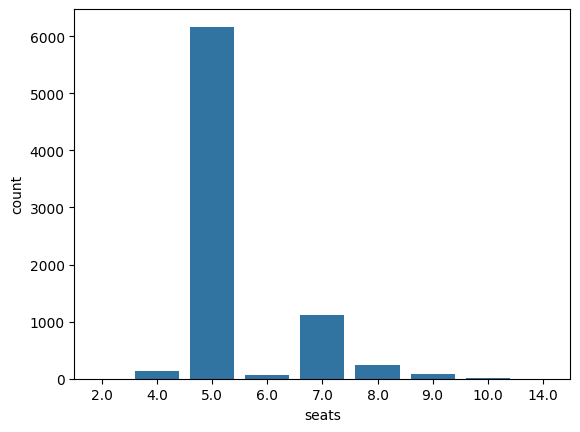

In [44]:
# Countplot - for the categorical -   most of the data is 5 seats car 
sns.countplot(data = df_eda, x = 'seats')

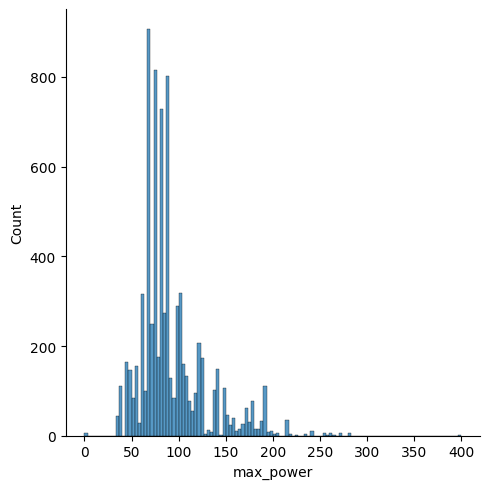

In [45]:
# Distribution plot - both categorical & continue
sns.displot(data = df_eda, x = 'max_power')

## Multivariate analysis

Text(0.5, 0, 'transmission')

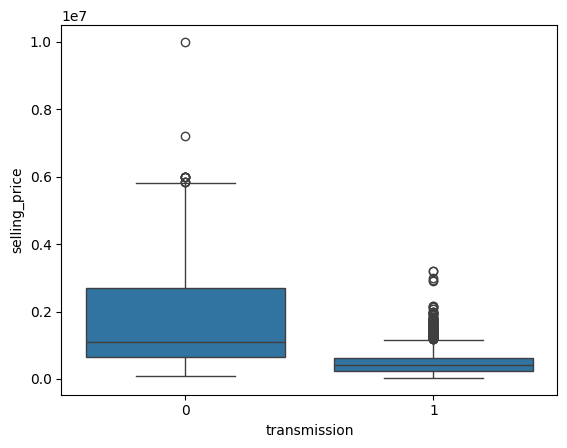

In [46]:
#Boxplot - Car transmission type 1 more selling price than type 2
sns.boxplot(x = df_eda["transmission"], y = df_eda["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("transmission")

<Axes: xlabel='year', ylabel='selling_price'>

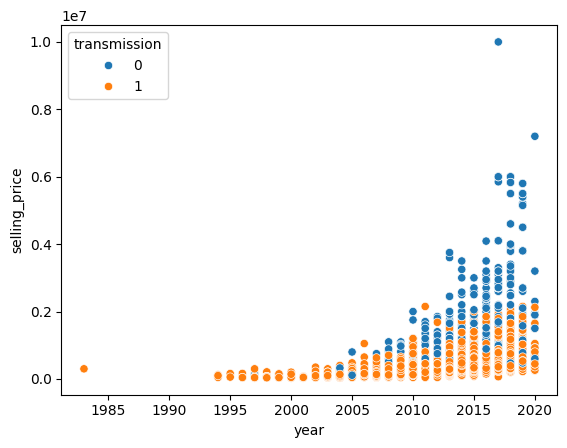

In [47]:
#Scatterplot both transmission types have increased in selling prices over the years.But the cars with transmission type "1" mostly got higher prices compared to those with type "0"
sns.scatterplot(x = df_eda['year'], y = df_eda['selling_price'], hue=df_eda['transmission'])

## Heatmap

This is the correlation matrix which use to finds the strong factor & checking whether certain feature are too correlated.

<Axes: >

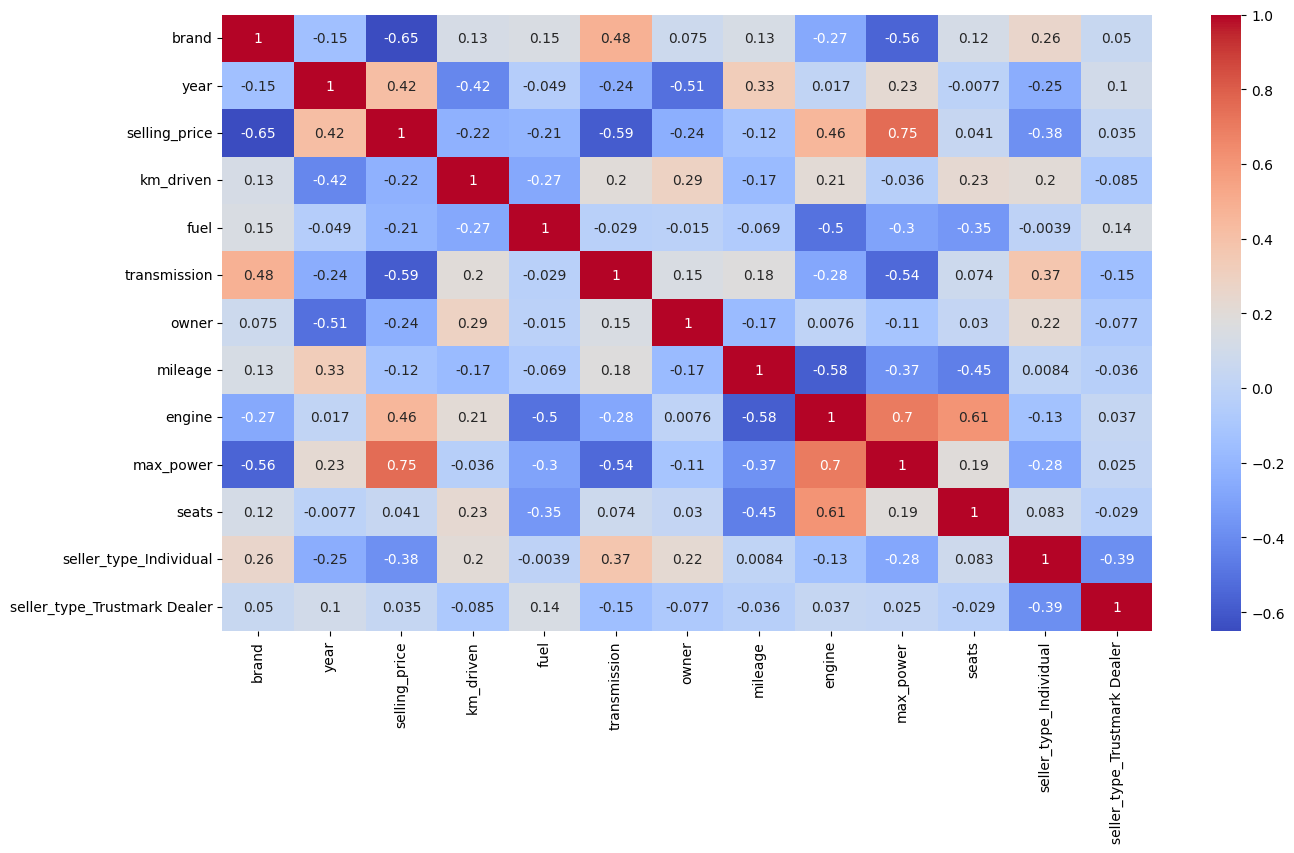

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(df_eda.corr(), annot=True, cmap="coolwarm") 

# 3. Feature Engineering

# 4.Feature Selection

## Drop the feature that not relevance

In [49]:
#drop column that not relevance (correlation number in heat map is too small)
df_selected = df_eda.drop('seats', axis='columns')

In [50]:
#Remove the feature that not effect the accuracy that much - look at part 8 (Do this after train)
df_selected = df_eda.drop(['seller_type_Trustmark Dealer', 'transmission', 'seller_type_Individual', 'fuel', 'brand', 'owner' ], axis='columns')

## Set x and y

In [51]:
#x is our strong features - No seat 
X = df_selected[[ 'year', 'km_driven', 'mileage', 'engine', 'max_power']]

#y is simply the selling_price
y = np.log(df_selected['selling_price'])

## Train test split

In [52]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

# 5. Preprocessing

## Null value - filled training set & testing set seperatly  

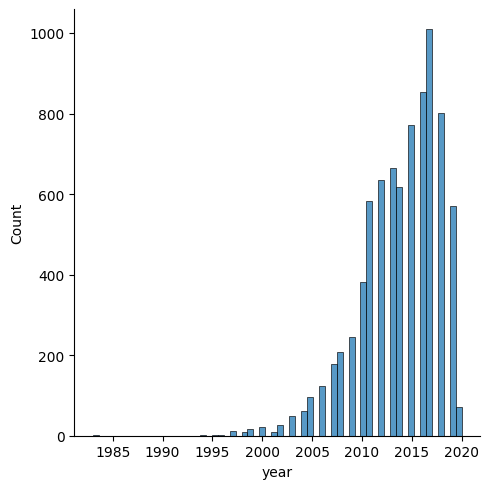

In [53]:
sns.displot(X.year)

In [54]:
#Check for null value - for selected feature
X.isnull().sum()   

year           0
km_driven      0
mileage      214
engine       214
max_power    208
dtype: int64

In [55]:
X.dtypes

year           int64
km_driven      int64
mileage      float64
engine       float64
max_power    float64
dtype: object

Fill the missing mileage data

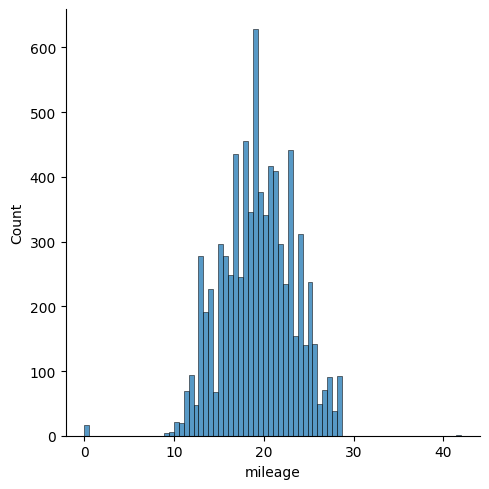

In [56]:
sns.displot(X.mileage)

In [57]:
#mileage data is normal >> fill the null with mean
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

#Fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\2250035120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\2250035120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Fill the missing engine data

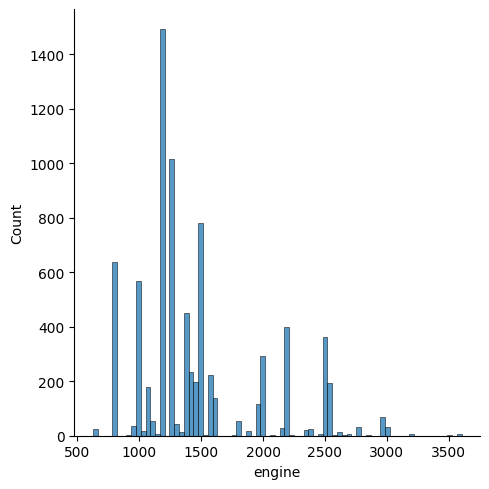

In [58]:
sns.displot(X.engine)

In [59]:
#engine data is not normal >> fill the null value with 
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

#Fill the testing set with the training distribution
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\1782278693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\1782278693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Fill the missing max_power data

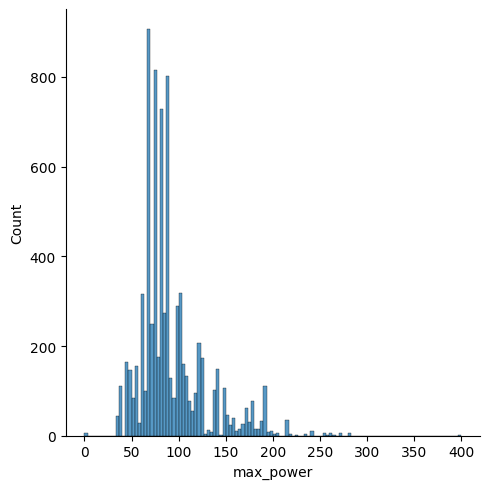

In [60]:
sns.displot(X.max_power)

In [61]:
#max_power is not normal >> fill the null valuwe with 
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

#Fill the testing set with the training distribution
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\4191762362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_18296\4191762362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [62]:
X_test.isnull().sum()   #Check for null value again

year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64

In [63]:
X_train.isnull().sum()   #Check for null value again

year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64

In [64]:
#Check null value for y
y_train.isnull().sum(), y_test.isnull().sum()

(np.int64(0), np.int64(0))

## outlier

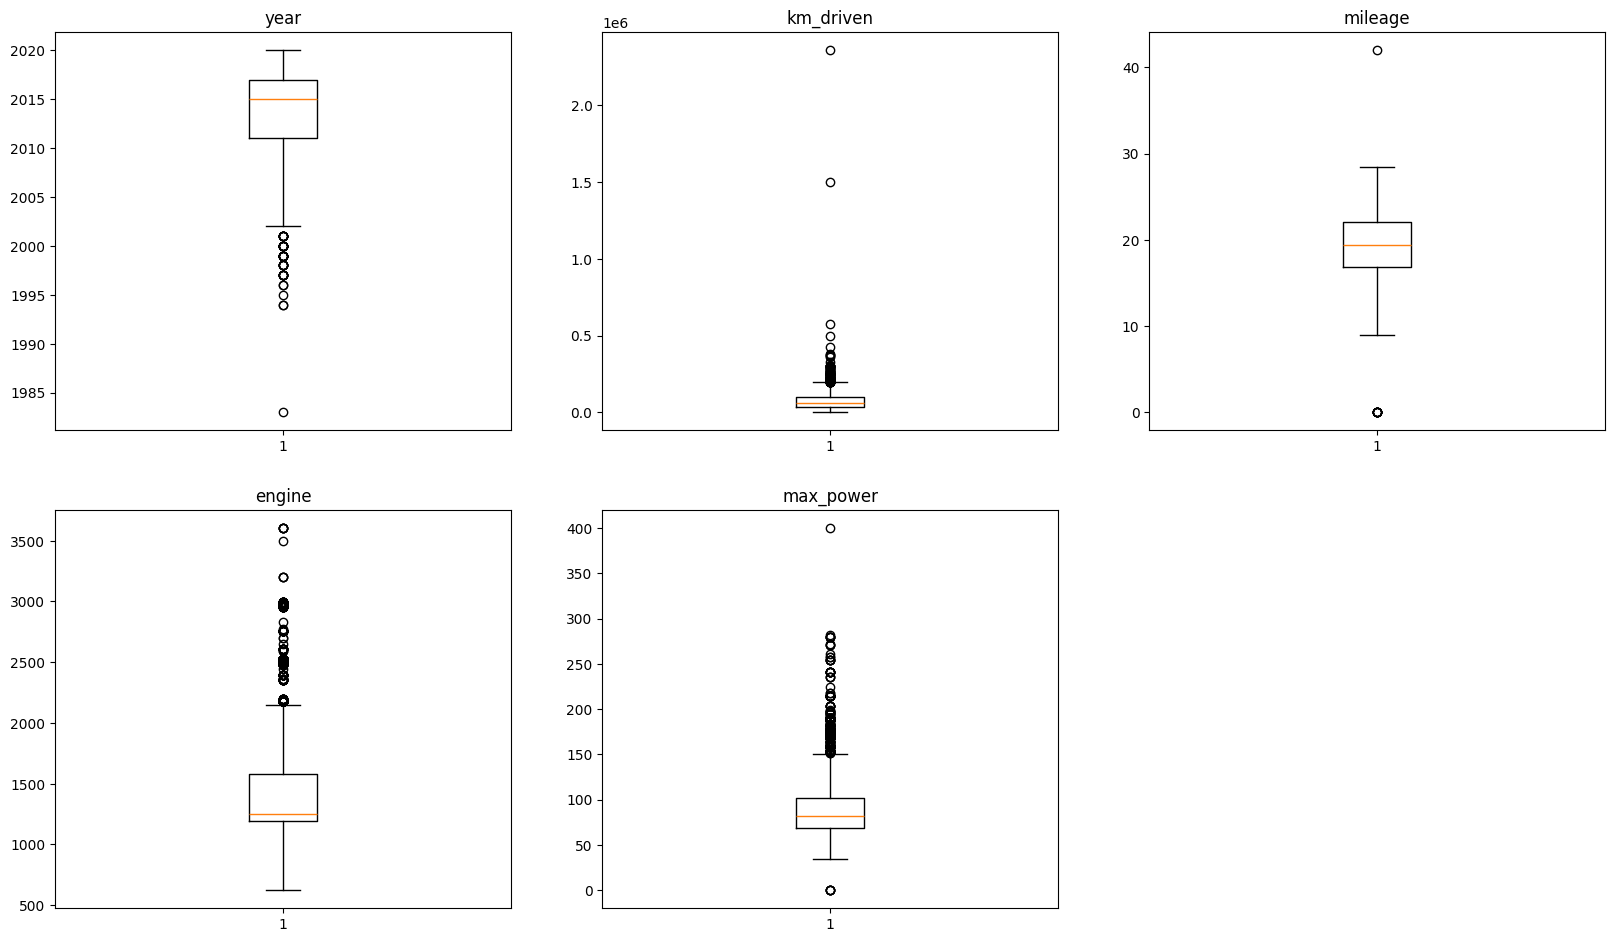

In [65]:
# Create a dictionary of columns.
col_dict = {'year':1, 'km_driven':2, 'mileage':3, 'engine':4, 'max_power':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,3,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [66]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [67]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 55
Percent of data that is outlier: 0.98%

---------------km_driven---------------

Number of outliers: 107
Percent of data that is outlier: 1.9%

---------------mileage---------------

Number of outliers: 10
Percent of data that is outlier: 0.18%

---------------engine---------------

Number of outliers: 804
Percent of data that is outlier: 14.31%

---------------max_power---------------

Number of outliers: 411
Percent of data that is outlier: 7.31%


### Apply the polynomial regression (To increase number of feature)

In [68]:
#Seperate X_train and X_test from the origianl X_train & X_test to compair 
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
X_train_poly  = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_train_poly)
X_test_poly  = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_test_poly)

## Scaling - helps improve reach convergence faster

### Apply Standard Scaler & Adding intercept to testing and traning data 

Adding intercept is the common step in preparing data for linear regression models - to make the model more accurate and flexible in its prediction.

In [70]:
#Applying Standdard scaler
from sklearn.preprocessing import StandardScaler
import pickle as pkl

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#Adding intercept 
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [71]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


For polynomail feature

In [72]:
#Applying Standdard scaler
scaler_poly = StandardScaler()
X_train_poly = scaler_poly.fit_transform(X_train_poly)
X_test_poly  = scaler_poly.transform(X_test_poly)

#Adding intercept 
intercept = np.ones((X_train_poly.shape[0], 1))
X_train_poly   = np.concatenate((intercept, X_train_poly), axis=1)
intercept = np.ones((X_test_poly.shape[0], 1))
X_test_poly    = np.concatenate((intercept, X_test_poly), axis=1)

In [73]:
#Show that when apply the Polynomial this will increase the number of feature
print("Shape of X_train_poly: ", X_train_poly.shape)
print("Shape of X_test_poly: ", X_test_poly.shape)

Shape of X_train_poly:  (5619, 21)
Shape of X_test_poly:  (2409, 21)


# 6. Modeling

## Add the experiment tracking (MLflow)

In [74]:
#Have to active on the docker first before doing this!
import mlflow
import os
mlflow.set_tracking_uri("http://localhost:5000")
os.environ["LOGNAME"] = "amy"
mlflow.set_experiment(experiment_name="amy-Assignment2-Final101")

2025/02/17 00:27:58 INFO mlflow.tracking.fluent: Experiment with name 'amy-Assignment2-Final101' does not exist. Creating a new experiment.


<Experiment: artifact_location='/mlflow-artifacts/3', creation_time=1739726878281, experiment_id='3', last_update_time=1739726878281, lifecycle_stage='active', name='amy-Assignment2-Final101', tags={}>

In [75]:
y_train = y_train.values
y_test = y_test.values

## Creat each model

In [3]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=50, batch_size=50, cv=kfold, momentum = False):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        #For the  momentum
        self.prev_step = 0

    #Adding the r2 function to compute r2 score
    def r2 (self, ytrue, ypred) :
        y_bar = np.mean(ytrue)
        ssres = ((ypred - ytrue) ** 2).sum()
        sstot = ((ypred - y_bar) ** 2).sum()
        r2 = 1 - (ssres/sstot)
        return r2
    
    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]

  #Adding Xavier method -  helping to set the initial random weights 
    def xavier(self, num_features):
        m = num_features
        lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
        numbers = np.random.rand(m) 
        scaled = lower + numbers * (upper - lower)
        return scaled

#Adding the weight_init to make it's start with the same value parameter in weight and bias every time we run this code
#Adding moment to gain the faster convergence and reduce oscillation
    def fit(self, weight_init, momentum, X_train, y_train):
        
        if momentum == True:
            self.momentum = 0.5
        else:
            self.momentum = 0

        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            # Weight initialization
            if weight_init == 'xavier':
                self.theta = self.xavier(X_cross_train.shape[1])
            else:
                self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__, "weight_init": weight_init, "momentum_value": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss, train_loss_r2 = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss, train_loss_r2  = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss, train_loss_r2 = self._train(X_method_train, y_method_train)

                    

                    #Validation
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_loss_new_r2 = self.r2(y_cross_val, yhat_val)

                    #Log metrics
                    mlflow.log_metric(key="train_loss", value = train_loss, step=epoch)
                    mlflow.log_metric(key="train_loss_r2", value = train_loss_r2, step=epoch)
                    mlflow.log_metric(key="val_loss", value = val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_loss_r2", value = val_loss_new_r2, step=epoch)

                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                
                print(f"Fold {fold} >> mse: {val_loss_new} r2: {val_loss_new_r2}")


                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m = X.shape[0]
        # Compute gradient and ensure it's a 1D array
        grad = (1/m) * X.T @ (yhat - y) + self.regularization.derivation(self.theta)
        grad = grad.flatten()  # Flatten to 1D
        if self.method == 'sto' :
            y = np.array([y])
        ######### Update theta ###########
        step = self.lr * grad
        self.theta = self.theta - step + (self.momentum * self.prev_step)
        self.prev_step = step
        #################################        
        return self.mse(y, yhat), self.r2(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

### Create the Normal , Ridge, Lasso and Elastic class that extends the LinearRegression, with added penalty.

In [77]:
#Normal = Normal linear regression without any regularization
class NormalPenalty:
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): 
        return 0    # No penalty added
        
    def derivation(self, theta):
        return 0  

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)


class Normal(LinearRegression):
    def __init__(self, method, lr, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method)  

class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
# Ensure ElasticNet's __init__ accepts l_ratio parameter correctly
class ElasticNet(LinearRegression):
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

# 7. Experiment

In [78]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [79]:
regs = ["Normal", "Ridge", "Lasso","Poly"]
methods = ['batch','mini', 'sto']
learning_rates = [0.01, 0.001, 0.0001]
init_weights = ['zero', 'xavier']
momentums = [True, False]
Best = []

for reg in regs:
    for method in methods:
        for lr in learning_rates:
            for init_weight in init_weights:
                for momentum in momentums:
                    if reg == "Poly":
                        X_test = X_test_poly
                        X_train = X_train_poly


                    params = {"method": method, "lr": lr, "l": 0.1}
                    run_name = f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-init_weight-{init_weight}-momentum-{momentum}"
                    with mlflow.start_run(run_name=run_name, nested=True):
                        try:

                            print("="*5, f'"method-{method}-lr-{lr}-reg-{reg}-init_weight-{init_weight}-momentum-{momentum}', "="*5)
                            if reg == "Poly":
                                type_of_regression = str_to_class("Normal")  # Ensure this function exists and can convert strings to class types
                            else:
                                type_of_regression = str_to_class(reg)  # Ensure this function exists and can convert strings to class types
                            # Initialize model with correct parameters
                            model = type_of_regression(method=params['method'], lr=params['lr'], l=params['l'])
                            # Assuming the existence of X_train, y_train, X_test, y_test and the model has fit, predict, mse, and r2 methods.
                            # Train model
                            model.fit(init_weight, momentum, X_train, y_train)
                            # Predict and evaluate
                            yhat = model.predict(X_test)
                            mse = model.mse(y_test, yhat)
                            r2 = model.r2(y_test, yhat)
                            # Log parameters and metrics
                            mlflow.log_params(params)
                            mlflow.log_metric("test_mse", mse)
                            mlflow.log_metric("test_r2", r2)
                            
                            print(f'test_mse :{mse}, test_r2 : {r2}')
                            # Log model
                            signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                            mlflow.sklearn.log_model(model, "model", signature=signature)

                            Best.append({
                                "configuration": f"method-{method}-lr-{lr}-reg-{reg}-init_weight-{init_weight}-momentum-{momentum}",
                                "mse": mse,
                                "r2": r2
                            })

                        except Exception as e:
                            print(f"Error training {reg}: {str(e)}")
                            mlflow.log_param("error", str(e))

===== "method-batch-lr-0.01-reg-Normal-init_weight-zero-momentum-True =====
Fold 0 >> mse: 101.85297903125537 r2: -0.003869839420092225
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/3/runs/b10d2fe8c4f8435ab14c5e881b6097ed
🧪 View experiment at: http://localhost:5000/#/experiments/3
Fold 1 >> mse: 102.40495511948293 r2: -0.0028612500734612745
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/3/runs/f020f81529d9497687e02f7c6c4d92b5
🧪 View experiment at: http://localhost:5000/#/experiments/3
Fold 2 >> mse: 102.06934704842259 r2: -0.002754115036785576
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/3/runs/d4d07085e41d464197918f14c56e0f25
🧪 View experiment at: http://localhost:5000/#/experiments/3
test_mse :102.75216372535236, test_r2 : -0.0024786569424131155
🏃 View run method-batch-lr-0.01-reg-Normal-init_weight-zero-momentum-True at: http://localhost:5000/#/experiments/3/runs/444ca81630bb4cf3b004b38654375ecc
🧪 View experiment at: http://localhost:5000/#/experi

In [80]:
#Finding for the best configuration - Using list
best_by_mse = min(Best, key=lambda x: x['mse'])
best_by_r2 = max(Best, key=lambda x: x['r2'])

print(f"Best configuration by MSE: {best_by_mse['configuration']} with MSE: {best_by_mse['mse']}")
print(f"Best configuration by R2: {best_by_r2['configuration']} with R2: {best_by_r2['r2']}")  

Best configuration by MSE: method-mini-lr-0.01-reg-Poly-init_weight-xavier-momentum-False with MSE: 0.09393472076977179
Best configuration by R2: method-mini-lr-0.01-reg-Poly-init_weight-zero-momentum-False with R2: 0.8422507123283778


In [81]:
#Finding for the best configuration - Using mlflow
import mlflow
import pandas as pd
import numpy as np

# Set the tracking URI
mlflow.set_tracking_uri("http://localhost:5000")

# Define the experiment name
experiment_name = "amy-Assignment2-Final101"

# Get the experiment ID
experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Search for runs in the experiment
runs = mlflow.search_runs(experiment_ids=[experiment_id])

# Initialize lists to store run information
run_ids = []
test_r2_values = []
test_mse_values = []
run_names = []

# Extract relevant information from each run
for index, row in runs.iterrows():
    run_id = row['run_id']
    test_r2 = row['metrics.test_r2']
    test_mse = row['metrics.test_mse']
    run_name = row['tags.mlflow.runName']
    
    if not np.isnan(test_r2) and not np.isnan(test_mse):
        run_ids.append(run_id)
        test_r2_values.append(test_r2)
        test_mse_values.append(test_mse)
        run_names.append(run_name)

# Create a DataFrame to store model scores
model_scores = pd.DataFrame({
    "run_id": run_ids,
    "test_r2": test_r2_values,
    "test_mse": test_mse_values,
    "run_name": run_names
})

# Find the best model based on R²
best_model_r2 = model_scores.sort_values(by="test_r2", ascending=False).iloc[0]

# Find the best model based on MSE
best_model_mse = model_scores.sort_values(by="test_mse", ascending=True).iloc[0]

# Print the best model based on R²
print("Best configuration by R2:")
print("Run ID:", best_model_r2["run_id"])
print("Test MSE:", best_model_r2["test_mse"])
print("Test R-squared:", best_model_r2["test_r2"])
print("Run Name:", best_model_r2["run_name"])

# Print the best model based on MSE
print("\nBest configuration by MSE:")
print("Run ID:", best_model_mse["run_id"])
print("Test MSE:", best_model_mse["test_mse"])
print("Test R-squared:", best_model_mse["test_r2"]) 
print("Run Name:", best_model_mse["run_name"])

Best configuration by R2:
Run ID: fc77a67d106e4b13868cefbef35488dd
Test MSE: 0.09396428948886086
Test R-squared: 0.8422507123283778
Run Name: method-mini-lr-0.01-reg-Poly-init_weight-zero-momentum-False

Best configuration by MSE:
Run ID: 3dfcf6ba160b4a9498e7441cde55a6be
Test MSE: 0.09393472076977179
Test R-squared: 0.8417360342157236
Run Name: method-mini-lr-0.01-reg-Poly-init_weight-xavier-momentum-False


In [82]:
import mlflow.sklearn
import pickle

# Save model as pickle
# Load Model using sklearn - if we use nomal way - it's didn't have the coef
model_uri = f"runs:/{best_model_mse['run_id']}/model"
loaded_model = mlflow.sklearn.load_model(model_uri) 
with open(r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\bestmodel.pkl', 'wb') as f:
    pickle.dump(loaded_model, f)

# Save polynomial scaler
pickle_file_scaler_poly_path = r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\pk_scaler_poly1.pkl'
with open(pickle_file_scaler_poly_path, 'wb') as file:
    pickle.dump(scaler_poly, file)

# Save normal scaler
pickle_file_scaler_path = r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\pk_scaler1.pkl'
with open(pickle_file_scaler_path, 'wb') as file:
    pickle.dump(scaler, file)


# 8. Analysis: Feature Importance

In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import PolynomialFeatures

# Load from pickle
with open(r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\bestmodel.pkl', 'rb') as f:
    used_model = pickle.load(f)

# Get coefficients
coefficients = used_model._coef()  # Now works!

# As we don't know the feature name, We generate the polynomail feature names
original_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(np.zeros((1, len(original_features))))
feature_names = poly.get_feature_names_out(original_features)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients, tick_label=feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance with Coefficients')

# Display the plot
plt.show()


AttributeError: Can't get attribute 'Normal' on <module '__main__'>

# 9. Inference

In [2]:
import numpy as np
import pickle

with open(r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\bestmodel.pkl', 'rb') as f:
    model_pp = pickle.load(f)  # Has _coef() and predict()

with open(r'D:\Amy\AIT\Term 2\ML\MLAssignment\A2\model\pk_scaler_poly1.pkl', 'rb') as f:
    scaler = pickle.load(f)

# 2. Prepare sample input (original features)
# Format: [year, km_driven, mileage, engine, max_power]
sample_input = np.array([[2015, 50000, 20.4, 1197, 83.11]])

from sklearn.preprocessing import PolynomialFeatures
sample_input  = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(sample_input)

# 3. Preprocess the input identically to training data
# Scale features
scaled_input = scaler.transform(sample_input)

# Add intercept (column of 1s)
intercept = np.ones((scaled_input.shape[0], 1))
processed_input = np.concatenate((intercept, scaled_input), axis=1)

# 4. Predict
log_price = model_pp.predict(processed_input)

# 5. Convert from log price to actual price
predicted_price = np.exp(log_price)

print(f"Predicted Selling Price: ₹{predicted_price[0]:.2f}")

AttributeError: Can't get attribute 'Normal' on <module '__main__'>

# Task 2 : short Report

### 1. **Best Model Configuration**  
After comparing different models, I identified two leading candidates—one that performed best using the Mean Squared Error (MSE) metric and another that excelled when evaluated with the R-squared (R²) metric. Given that my primary goal is predictive accuracy, I have chosen to adopt the model with the lowest MSE. This choice aligns with my objective to minimize prediction errors, which is crucial for the practical application of the model in forecasting and decision-making scenarios.

- **Selected Model (Lowest MSE)**:  
  - **MSE**: 0.09393472076977179 | **R²**: 0.8417360342157236 
  - **Configuration**:  
    - **Regularization**: Polynomial  
    - **Batch Strategy**: Mini-batch  
    - **Learning Rate**: 0.01  
    - **Initialization**: Xavier  
    - **Momentum**: Disabled  
    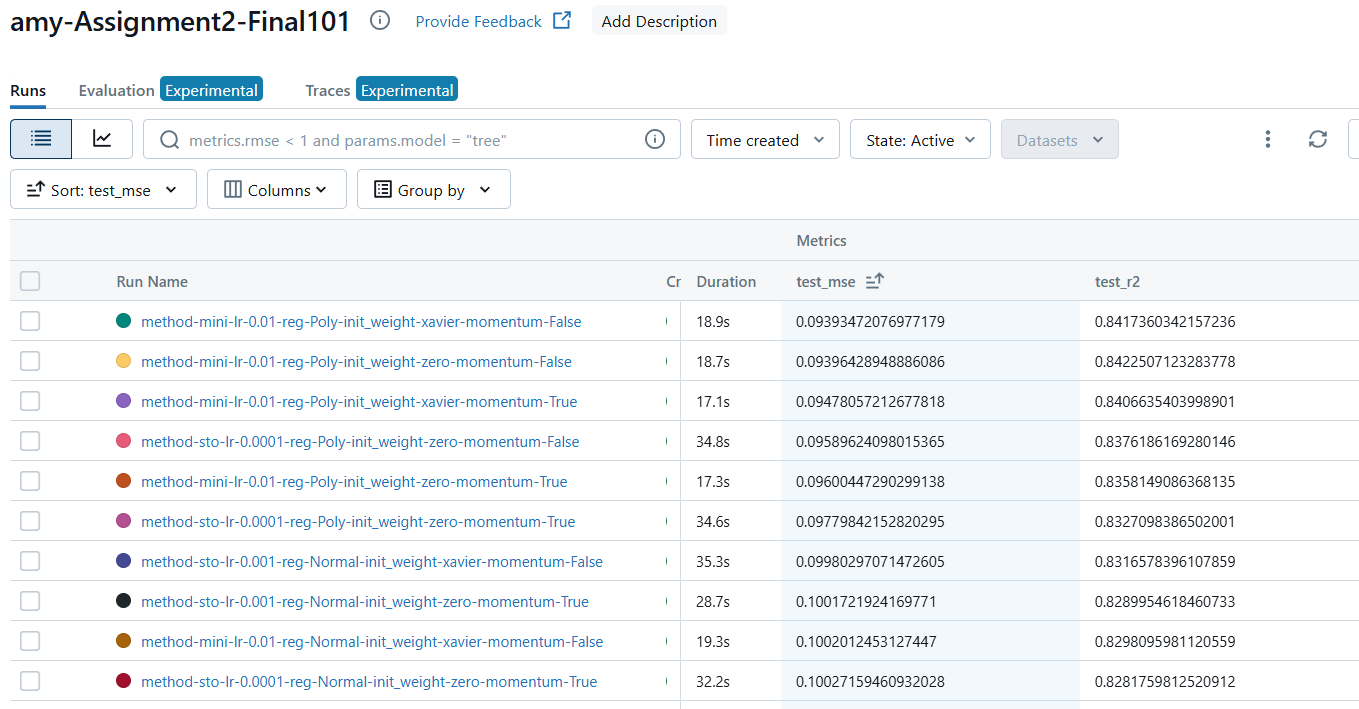

### Comparing between each learning rate
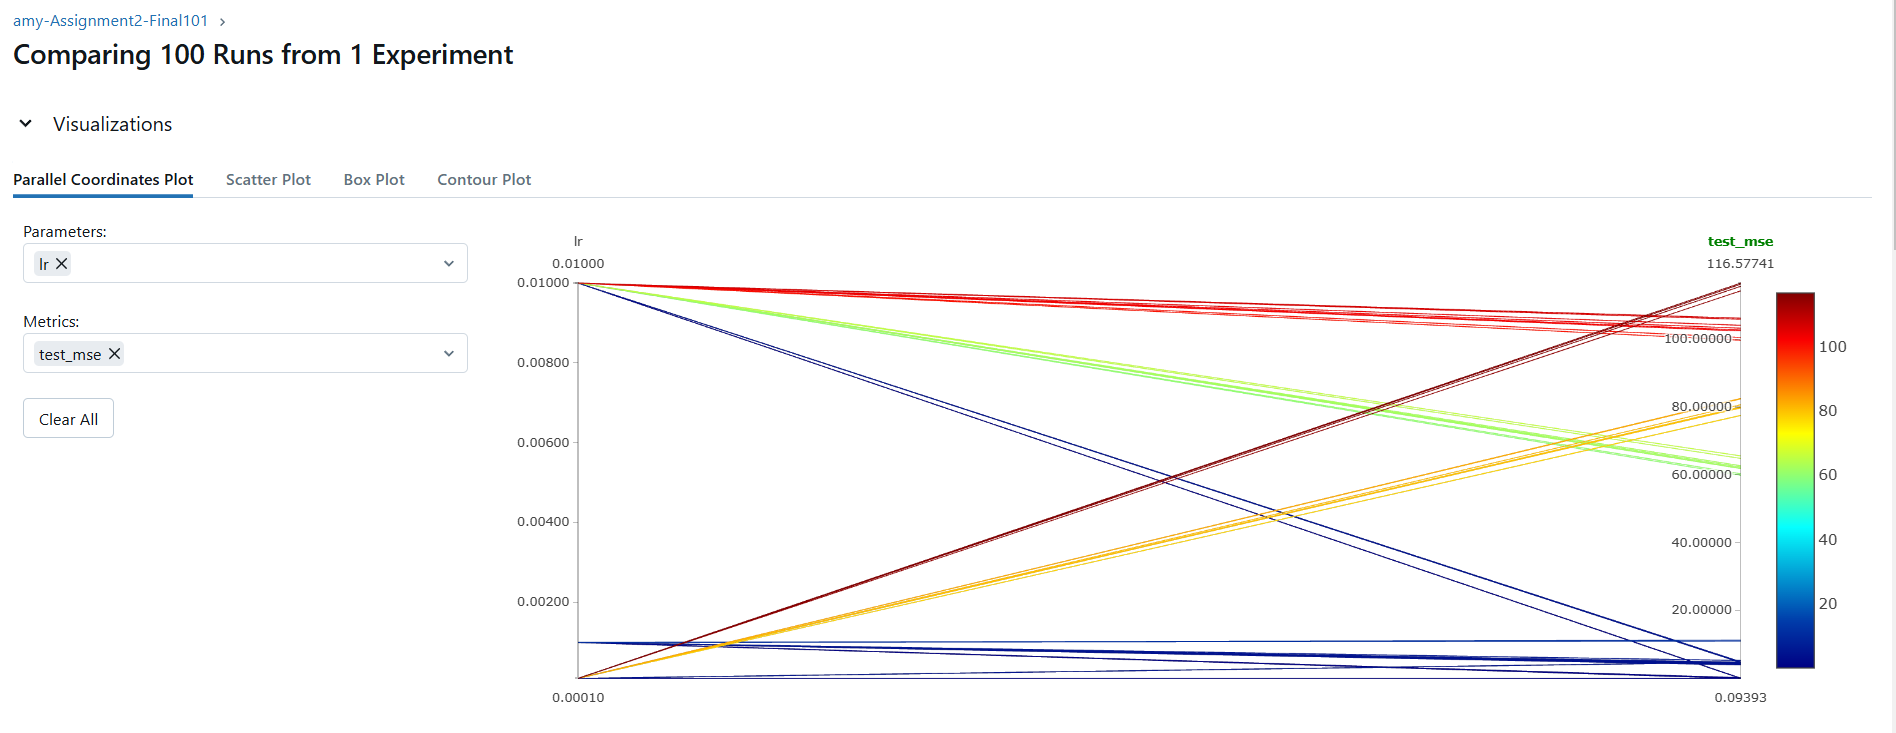

The image comparing the effects of different learning rates from the experiment demonstrates that certain rates consistently lead to more accurate predictions. Specifically, models trained with lower learning rates, as indicated by the lower-reaching blue lines, tend to achieve lower mean squared errors (MSE). This suggests that a lower learning rate is more effective at reducing prediction errors compared to higher rates, as reflected by the lower MSE values.

### Compaing between each method
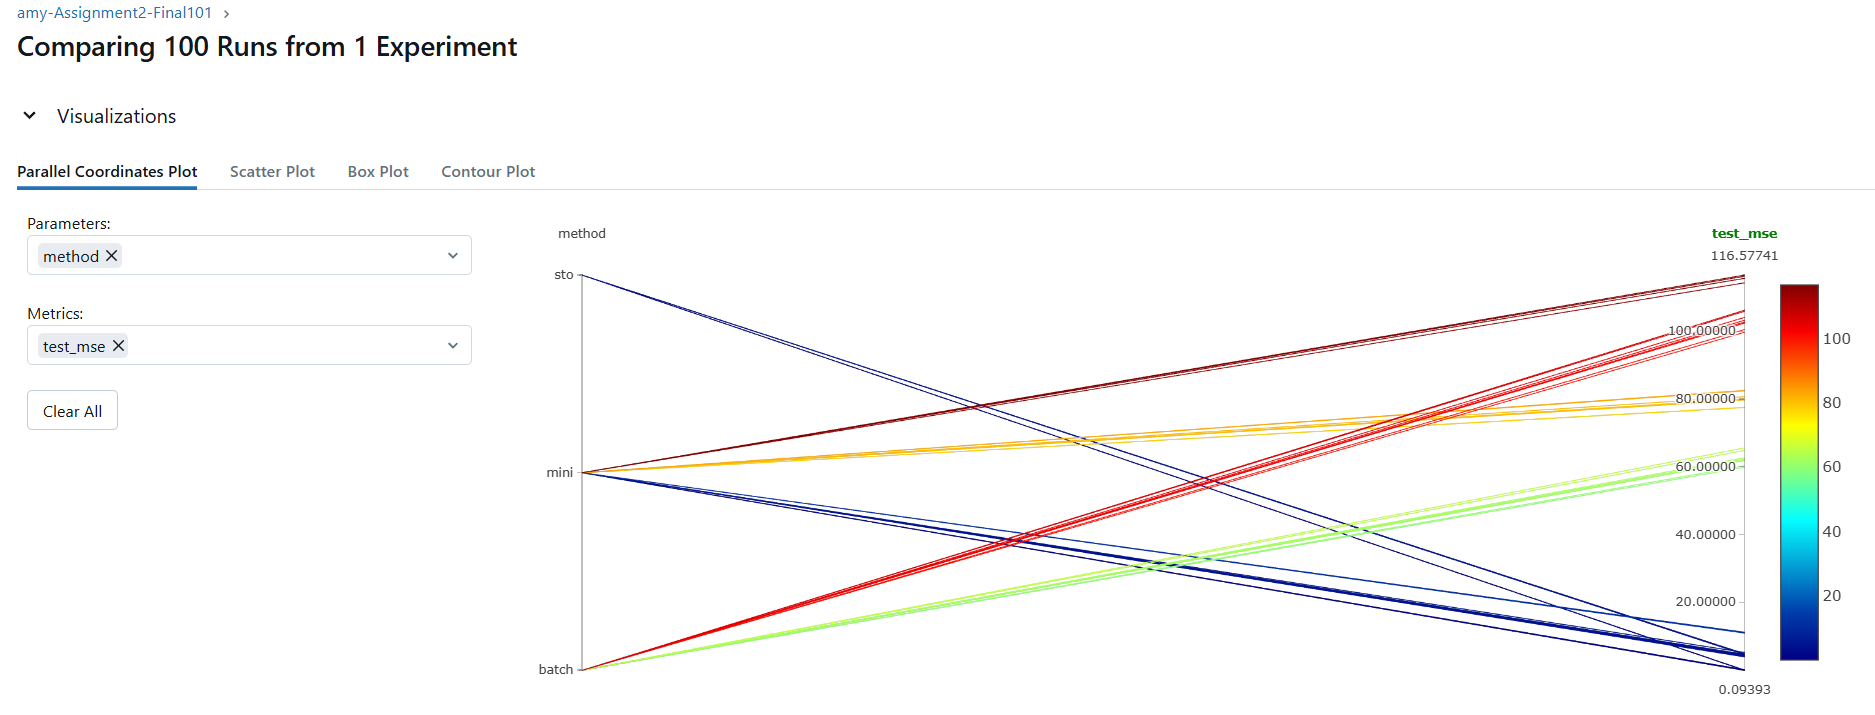

The image comparing different model training methods from the experiment demonstrates that certain methods consistently lead to more accurate predictions. Specifically, models trained using the 'mini' method, as indicated by the lower-reaching green lines, tend to achieve lower mean squared errors (MSE). This suggests that the 'mini' method is more effective at reducing prediction errors compared to the 'sto' and 'batch' methods, as reflected by the lower MSE values